<a href="https://colab.research.google.com/github/kalstephen/mb-app/blob/main/Deep_Learning_Chest_Opacity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import os
import random
import shutil
from sklearn.model_selection import train_test_split

# Define paths to the dataset folders
data_dir = '/content/drive/MyDrive/Colab Notebooks/Deep_Learning_Chest_Opacity/deep_learning_project/deep_learning_project/dataset1/known_images'
train_dir = '/content/drive/MyDrive/Colab Notebooks/Deep_Learning_Chest_Opacity/deep_learning_project/deep_learning_project/dataset1/train'
val_dir = '/content/drive/MyDrive/Colab Notebooks/Deep_Learning_Chest_Opacity/deep_learning_project/deep_learning_project/dataset1/validation'
test_dir = '/content/drive/MyDrive/Colab Notebooks/Deep_Learning_Chest_Opacity/deep_learning_project/deep_learning_project/dataset1/test'


In [9]:
# Create directories for the train, validation, and test sets
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)


In [10]:
# Split the normal images into train, validation, and test sets
normal_images = [filename for filename in os.listdir(data_dir) if filename.startswith("normal")]
normal_train, normal_test = train_test_split(normal_images, test_size=0.2, random_state=42)
normal_train, normal_val = train_test_split(normal_train, test_size=0.2, random_state=42)


In [11]:
# Copy the normal images to their respective directories
for filename in normal_train:
    shutil.copy(os.path.join(data_dir, filename), os.path.join(train_dir, filename))
for filename in normal_val:
    shutil.copy(os.path.join(data_dir, filename), os.path.join(val_dir, filename))
for filename in normal_test:
    shutil.copy(os.path.join(data_dir, filename), os.path.join(test_dir, filename))


In [12]:
# Split the sick images into train, validation, and test sets
sick_images = [filename for filename in os.listdir(data_dir) if filename.startswith("sick")]
sick_train, sick_test = train_test_split(sick_images, test_size=0.2, random_state=42)
sick_train, sick_val = train_test_split(sick_train, test_size=0.2, random_state=42)

In [13]:
# Copy the sick images to their respective directories
for filename in sick_train:
    shutil.copy(os.path.join(data_dir, filename), os.path.join(train_dir, filename))
for filename in sick_val:
    shutil.copy(os.path.join(data_dir, filename), os.path.join(val_dir, filename))
for filename in sick_test:
    shutil.copy(os.path.join(data_dir, filename), os.path.join(test_dir, filename))

In [14]:
# Get the count of normal and sick images in each set
def count_images(directory):
    normal_count = 0
    sick_count = 0
    for filename in os.listdir(directory):
        if filename.startswith("normal_"):
            normal_count += 1
        elif filename.startswith("sick_"):
            sick_count += 1
    return normal_count, sick_count


train_normal_count, train_sick_count = count_images(train_dir)
val_normal_count, val_sick_count = count_images(val_dir)
test_normal_count, test_sick_count = count_images(test_dir)

In [15]:
# Get the total number of images
total_count = train_normal_count + train_sick_count + val_normal_count + val_sick_count + test_normal_count + test_sick_count

# Calculate the percentages
train_normal_pct = train_normal_count / total_count * 100
train_sick_pct = train_sick_count / total_count * 100
val_normal_pct = val_normal_count / total_count * 100
val_sick_pct = val_sick_count / total_count * 100
test_normal_pct = test_normal_count / total_count * 100
test_sick_pct = test_sick_count / total_count * 100

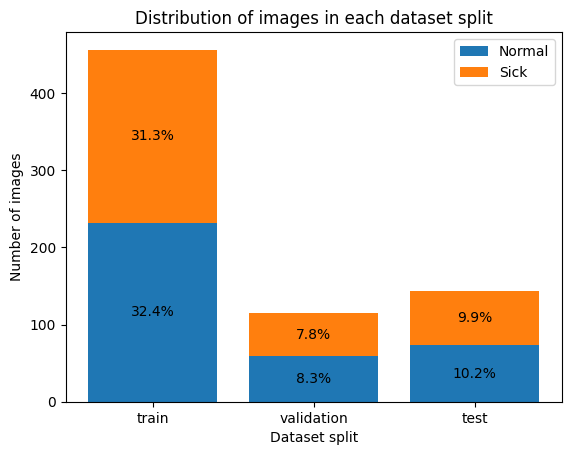

In [16]:
# Plot the distribution of normal and sick images in each set
import matplotlib.pyplot as plt
labels = ["train", "validation", "test"]
normal_counts = [train_normal_count, val_normal_count, test_normal_count]
sick_counts = [train_sick_count, val_sick_count, test_sick_count]
normal_pcts = [train_normal_pct, val_normal_pct, test_normal_pct]
sick_pcts = [train_sick_pct, val_sick_pct, test_sick_pct]

fig, ax = plt.subplots()
ax.bar(labels, normal_counts, label="Normal")
ax.bar(labels, sick_counts, bottom=normal_counts, label="Sick")
ax.set_xlabel("Dataset split")
ax.set_ylabel("Number of images")
ax.set_title("Distribution of images in each dataset split")
ax.legend()
# Add the percentage labels
for i, (normal_count, sick_count) in enumerate(zip(normal_counts, sick_counts)):
    total = normal_count + sick_count
    ax.text(i, normal_count / 2, f"{normal_pcts[i]:.1f}%", ha="center", va="center")
    ax.text(i, total - sick_count / 2, f"{sick_pcts[i]:.1f}%", ha="center", va="center")

plt.show()

In [17]:
# Create subdirectories for the two classes within train, validation, and test set
class_names = ["Sick", "Normal"]
for directory in [train_dir, val_dir, test_dir]:
    for class_name in class_names:
        os.makedirs(os.path.join(directory, class_name), exist_ok=True)

# Move images to their respective class subdirectories
for filename in os.listdir(train_dir):
    if filename.startswith("sick"):
        shutil.move(os.path.join(train_dir, filename), os.path.join(train_dir, "Sick", filename))
    elif filename.startswith("normal"):
        shutil.move(os.path.join(train_dir, filename), os.path.join(train_dir, "Normal", filename))

# Move images to their respective class subdirectories
for filename in os.listdir(val_dir):
    if filename.startswith("sick"):
        shutil.move(os.path.join(val_dir, filename), os.path.join(val_dir, "Sick", filename))
    elif filename.startswith("normal"):
        shutil.move(os.path.join(val_dir, filename), os.path.join(val_dir, "Normal", filename))

# Move images to their respective class subdirectories
for filename in os.listdir(test_dir):
    if filename.startswith("sick"):
        shutil.move(os.path.join(test_dir, filename), os.path.join(test_dir, "Sick", filename))
    elif filename.startswith("normal"):
        shutil.move(os.path.join(test_dir, filename), os.path.join(test_dir, "Normal", filename))

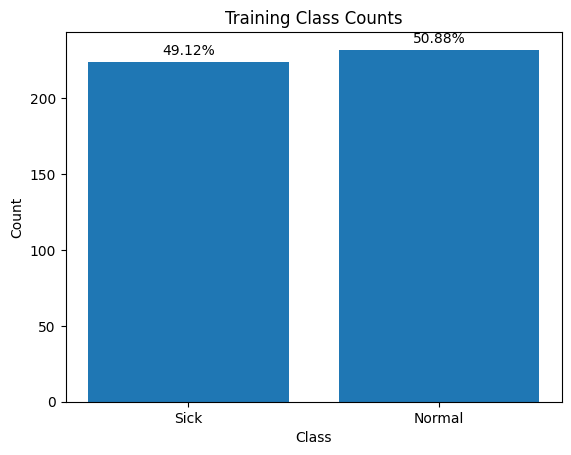

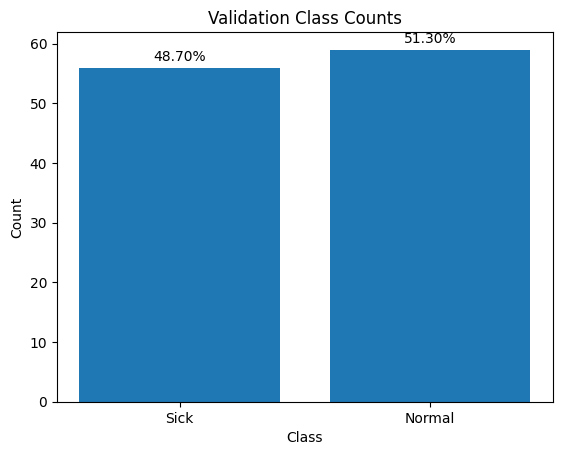

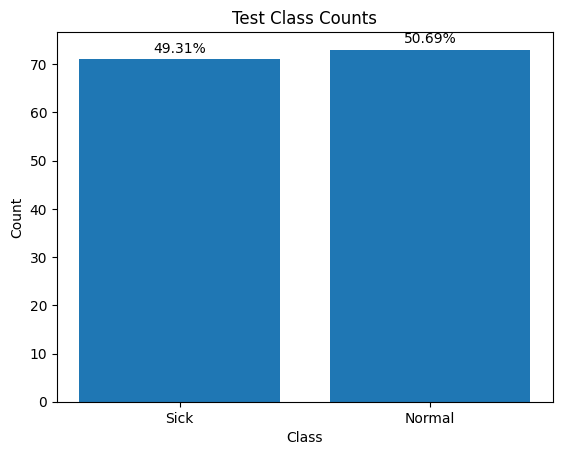

In [18]:
#Plotting for Sick and Normal per set
def plot_class_counts(dir, title):
    sick_path = os.path.join(dir, 'Sick')
    normal_path = os.path.join(dir, 'Normal')
    
    sick_count = len(os.listdir(sick_path)) if os.path.exists(sick_path) else 0
    normal_count = len(os.listdir(normal_path)) if os.path.exists(normal_path) else 0
 
    plt.bar(['Sick', 'Normal'], [sick_count, normal_count])
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Count')
 
    total_count = sick_count + normal_count
    if total_count > 0:
        for i, v in enumerate([sick_count, normal_count]):
            plt.text(i, v + total_count * 0.01, f"{v / total_count * 100:.2f}%", 
                     ha='center')
 
    plt.show()
 
plot_class_counts(train_dir, 'Training Class Counts')
plot_class_counts(val_dir, 'Validation Class Counts')
plot_class_counts(test_dir, 'Test Class Counts')

In [19]:
!pip install tf-nightly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
import keras
from keras.applications.resnet50 import ResNet50
from keras.models import Sequential
from keras.layers import Dense, Flatten, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, mean_squared_error



In [21]:
# Define image dimensions and batch size
# Set image size and batch size
img_size = 224
batch_size = 32

In [22]:
# Data augmentation for the training set
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [23]:
# Data augmentation for the validation and test sets
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the ResNet50 model without the top layers
resnet50 = ResNet50(weights='imagenet',
                    include_top=False,
                    input_shape=(img_size, img_size, 3))


94765736/94765736 [==============================] - 1s 0us/step


In [24]:
# Freeze the layers
for layer in resnet50.layers:
    layer.trainable = False


In [32]:
# Create a new model based on ResNet50 with additional layers
model = Sequential()
model.add(resnet50)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [33]:
# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [34]:
# Generate batches of augmented data for the training set
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_size, img_size),
                                                    batch_size=batch_size,
                                                    class_mode='binary')


Found 450 images belonging to 2 classes.


In [35]:
# Generate batches of augmented data for the validation set
val_generator = val_datagen.flow_from_directory(val_dir,
                                                target_size=(img_size, img_size),
                                                batch_size=batch_size,
                                                class_mode='binary')

Found 115 images belonging to 2 classes.


In [36]:
# Generate batches of augmented data for the test set
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(img_size, img_size),
                                                  batch_size=batch_size,
                                                  class_mode='binary',
                                                  shuffle=False)

Found 129 images belonging to 2 classes.


In [37]:
# Train the model
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=val_generator)

Epoch 1/10
15/15 [==============================] - 134s 9s/step - loss: 0.7325 - accuracy: 0.5067 - val_loss: 0.6974 - val_accuracy: 0.5130
Epoch 2/10
15/15 [==============================] - 130s 9s/step - loss: 0.6751 - accuracy: 0.5600 - val_loss: 0.6776 - val_accuracy: 0.4870
Epoch 3/10
15/15 [==============================] - 130s 9s/step - loss: 0.6772 - accuracy: 0.5733 - val_loss: 0.6392 - val_accuracy: 0.6087
Epoch 4/10
15/15 [==============================] - 130s 9s/step - loss: 0.6901 - accuracy: 0.5089 - val_loss: 0.6181 - val_accuracy: 0.7130
Epoch 5/10
15/15 [==============================] - 110s 7s/step - loss: 0.6514 - accuracy: 0.5889 - val_loss: 0.6438 - val_accuracy: 0.5130
Epoch 6/10
15/15 [==============================] - 117s 8s/step - loss: 0.6238 - accuracy: 0.6822 - val_loss: 0.5840 - val_accuracy: 0.8348
Epoch 7/10
15/15 [==============================] - 131s 9s/step - loss: 0.6152 - accuracy: 0.6889 - val_loss: 0.5741 - val_accuracy: 0.7565
Epoch 8/10
15

In [38]:
# Evaluate the model on the test set
y_pred = model.predict(test_generator)
y_true = test_generator.classes
accuracy = accuracy_score(y_true, y_pred.round())
auc = roc_auc_score(y_true, y_pred)
precision = precision_score(y_true, y_pred.round())
mse = mean_squared_error(y_true, y_pred)

5/5 [==============================] - 27s 4s/step


In [39]:
#Print the results
print('Accuracy:', accuracy)
print('AUC:', auc)
print('Precision:', precision)
print('MSE:', mse)

Accuracy: 0.9147286821705426
AUC: 0.961839530332681
Precision: 0.9411764705882353
MSE: 0.1588359936625341


In [40]:
# Predict the classes of the test data using the trained model
import numpy as np
y_pred = model.predict(test_generator, steps=test_generator.samples // batch_size+1)

# Get the true classes of the test data
y_true = test_generator.classes

# Calculate the accuracy, AUC and precision
acc = accuracy_score(y_true, np.round(y_pred))
auc = roc_auc_score(y_true, y_pred)
precision = precision_score(y_true, np.round(y_pred))

print("Accuracy: {:.2f}%".format(acc*100))
print("AUC: {:.2f}%".format(auc*100))
print("Precision: {:.2f}%".format(precision*100))

5/5 [==============================] - 27s 5s/step
Accuracy: 91.47%
AUC: 96.18%
Precision: 94.12%


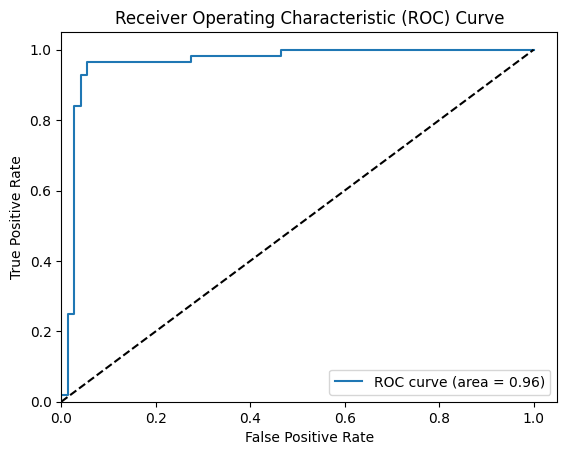

In [41]:
# Plot the accuracy and AUC curves
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, precision_score, mean_squared_error, confusion_matrix
import itertools
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Normalized confusion matrix
[[0.95890411 0.04109589]
 [0.14285714 0.85714286]]


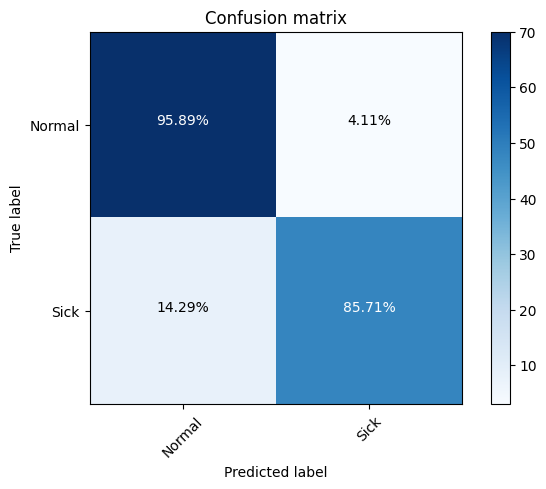

In [43]:
# Generate the confusion matrix
cm = confusion_matrix(y_true, np.round(y_pred))
classes = ['Normal', 'Sick']

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Normalize the confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Print the normalized confusion matrix
print("Normalized confusion matrix")
print(cm)

# Loop over the confusion matrix and append the percentage values
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, "{:.2f}%".format(cm[i, j]*100),
             horizontalalignment="center",
             color="white" if cm[i, j] > 0.5 else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

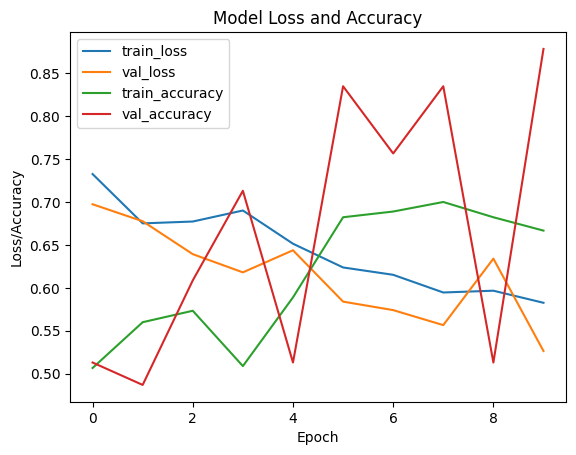

In [46]:
# plot the combined value and loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Loss and Accuracy')
plt.ylabel('Loss/Accuracy')
plt.xlabel('Epoch')
plt.legend(['train_loss', 'val_loss', 'train_accuracy', 'val_accuracy'], loc='upper left')
plt.show()


Using the above trained model1  to diagnose/classify all the images located in the “unknown_images” directory under dataset1 as either normal (0) or sick (1). Create a csv file and indicate the label/class your model has given to each of the images. 

In [126]:
# Define the paths to the unknown images
unknown_dir = '/content/drive/MyDrive/Colab Notebooks/Deep_Learning_Chest_Opacity/deep_learning_project/deep_learning_project/dataset1/unknown_images/unknown'

# Set the path to the CSV file to store the results
results_file = "/content/drive/MyDrive/Colab Notebooks/Deep_Learning_Chest_Opacity/deep_learning_project/deep_learning_project/dataset1/unknown_images/"


In [127]:
# Define the image size for the model
img_size = (224, 224)

In [128]:
# Create an empty list to store the predictions
import cv2
import numpy as np
import os
predictions = []
filenames = []

# Loop through all the images in the directory and make predictions
for filename in os.listdir(unknown_dir):
    if filename.endswith('.png'):
        # Read the image and resize it to the model input size
        img = cv2.imread(os.path.join(unknown_dir, filename))
        img = cv2.resize(img, img_size)

        # Preprocess the image for the model
        img = img.astype('float32') / 255.0
        img = np.expand_dims(img, axis=0)

        # Make a prediction
        pred = model.predict(img)

# Check if the prediction is not empty
       # Append the prediction to the list
        predictions.append(pred[0][0])
        filenames.append(filename)

        # # Append the prediction label to the list
        # if pred[0][0] > 0.5:
        #     predictions.append('SICK')
        # else:
        #     predictions.append('NORMAL')

        # # Print the prediction label with the image filename
        # print(f"{filename}: {predictions[-1]}")


1/1 [==============================] - 0s 188ms/step


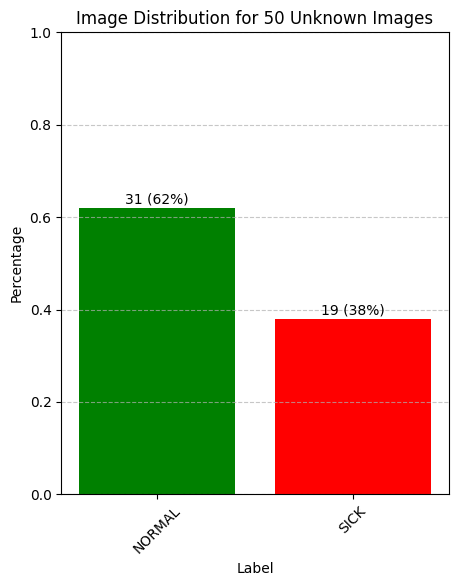

In [129]:
# Check if the length of the predictions list is the same as the length of the filenames list
if len(predictions) != len(filenames):
    print('Error: The predictions list and filenames list have different lengths')
else:
    # Create a dataframe to store the predictions and image labels
    import pandas as pd
    data = pd.DataFrame({'filename': filenames, 'prediction': predictions})

    # Add a new column to the dataframe to store the labels (SICK or NORMAL)
    data['label'] = ['SICK' if x > 0.5 else 'NORMAL' for x in data['prediction']]

    # Count the number of images that are SICK and NORMAL
    counts = data['label'].value_counts()

    # Calculate the total number of images
    total_images = counts.sum()

    # Plot a bar chart to visualize the counts
    plt.figure(figsize=(5,6))
    plt.bar(counts.index, counts.values/total_images, color=['green', 'red'])
    plt.title('Image Distribution for 50 Unknown Images')
    plt.xlabel('Label')
    plt.ylabel('Percentage')
    plt.ylim([0,1])
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.text(0, counts.values[0]/total_images+0.01, f'{counts.values[0]} ({counts.values[0]/total_images:.0%})', ha='center', fontsize=10)
    plt.text(1, counts.values[1]/total_images+0.01, f'{counts.values[1]} ({counts.values[1]/total_images:.0%})', ha='center', fontsize=10)
    plt.show()

    #saving the predicrtion file
    data.to_csv('/content/drive/MyDrive/Colab Notebooks/Deep_Learning_Chest_Opacity/deep_learning_project/deep_learning_project/dataset1/unknown_images/predictions.csv', index=False)

In [130]:
#checking for sample images
print(predictions)

[0.42575818, 0.38532943, 0.4053904, 0.62809426, 0.40099606, 0.6749052, 0.53269863, 0.4271358, 0.38575405, 0.38873857, 0.45294112, 0.619975, 0.55424094, 0.35828462, 0.37184262, 0.59778625, 0.36419237, 0.5172948, 0.6281412, 0.3989028, 0.42286375, 0.36314303, 0.27209654, 0.45610416, 0.37076476, 0.53074604, 0.6152499, 0.3515879, 0.2954206, 0.34811985, 0.61960065, 0.6175224, 0.5303529, 0.37622592, 0.35705107, 0.46187606, 0.3740229, 0.6427453, 0.31712508, 0.65959495, 0.5925628, 0.3761154, 0.43318874, 0.42339927, 0.2324761, 0.46397674, 0.5048232, 0.35014793, 0.59702367, 0.5911198]


•	Test the performance of your model on dataset2 and commit the test results (such as Accuracy, Precision etc) to your repository in a text file. Note that images in Dataset2 were captured under different conditions from those in Dataset1 and using a different machine; our intention is to determine how well the model will generalise on images captured under different condition.

In [131]:
# Define the paths to the unknown images
dataset2_dir = '/content/drive/MyDrive/Colab Notebooks/Deep_Learning_Chest_Opacity/deep_learning_project/deep_learning_project/dataset2/images'

# Set the path to the CSV file to store the results
results_dataset2 = "/content/drive/MyDrive/Colab Notebooks/Deep_Learning_Chest_Opacity/deep_learning_project/deep_learning_project/dataset2/"

In [132]:
# Define the image size for the model
img_size = (224, 224)

In [138]:
# Create an empty list to store the predictions
import cv2
import numpy as np
import os
predictions = []
filenames = []

# Loop through all the images in the directory and make predictions
for filenames in os.listdir(dataset2_dir):
    if filenames.endswith('.png'):
        # Read the image and resize it to the model input size
        img = cv2.imread(os.path.join(dataset2_dir, filenames))
        img = cv2.resize(img, img_size)

        # Preprocess the image for the model
        img = img.astype('float32') / 255.0
        img = np.expand_dims(img, axis=0)

        # Make a prediction
        pred = model.predict(img)

# Check if the prediction is not empty
       # Append the prediction to the list
        predictions.append(pred[0][0])
        #filenames.append(filename)

        # # Append the prediction label to the list
        if pred[0][0] > 0.5:
            predictions.append('SICK')
        else:
             predictions.append('NORMAL')

         # Print the prediction label with the image filename
             print(f"{filename}: {predictions[-1]}")


1/1 [==============================] - 0s 161ms/step
48.png: NORMAL
1/1 [==============================] - 0s 160ms/step
48.png: NORMAL
1/1 [==============================] - 0s 164ms/step
48.png: NORMAL
1/1 [==============================] - 0s 174ms/step
48.png: NORMAL
1/1 [==============================] - 0s 163ms/step
48.png: NORMAL
1/1 [==============================] - 0s 159ms/step
48.png: NORMAL
1/1 [==============================] - 0s 168ms/step
48.png: NORMAL
1/1 [==============================] - 0s 190ms/step
48.png: NORMAL
1/1 [==============================] - 0s 170ms/step
48.png: NORMAL
1/1 [==============================] - 0s 159ms/step
48.png: NORMAL
1/1 [==============================] - 0s 178ms/step
48.png: NORMAL
1/1 [==============================] - 0s 182ms/step
48.png: NORMAL
1/1 [==============================] - 0s 185ms/step
48.png: NORMAL
1/1 [==============================] - 0s 171ms/step
48.png: NORMAL
1/1 [==============================] - 0s 277ms/